# IEEE-CIS Fraud Detection Part 2

In this series of notebooks, we are working on a supervised, regression machine learning problem. Using Kaggle's competition [IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection) dataset, we want to predict whether a transaction is fraud or not. 

 ### Workflow 
 1. Understand the problem (we're almost there already)
 2. Exploratory Data Analysis
 3. Feature engineering to create a dataset for machine learning
 4. Create a baseline machine learning model
 5. Try more complex machine learning models
 6. Optimize the selected model
 7. Investigate model predictions in context of problem
 8. Draw conclusions and lay out next steps
 
The first notebook covered steps 1-3, and in this notebook, we will cover 4-8.

In [1]:
# Numpy and pandas
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistics tools
import scipy.stats as stats

# Sklearn data clean
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Logistic Regression
from sklearn.linear_model import Lasso, LogisticRegression

# KNN Classifer 
from sklearn.neighbors import KNeighborsClassifier

# Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus
import graphviz

# Random Forests 
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# SVM
from sklearn.svm import SVC

# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

# Evaluate
from sklearn import metrics
from sklearn.metrics import log_loss, f1_score,roc_auc_score, confusion_matrix, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Datetime
from datetime import datetime

# Import data
import warnings

Here, we will import two dataframes:
 - __df_le__: categorical variables were Label Encoded, designed for tree-based models
 - __df_db__: categorical variables were OneHotEncoded, designed for linear and distance dependent models

In [2]:
# List files available
df_le = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/clean_df_le.csv')
df_db = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/ieee-fraud-detection/clean_df_db.csv')

In [3]:
# Display sizes of data
print('Df_le Training Feature Size: ', df_le.shape)
print('Df_db Training Feature Size: ', df_db.shape)

Df_le Training Feature Size:  (32902, 422)
Df_db Training Feature Size:  (32902, 509)


In [4]:
df_le.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_38,DeviceType,transaction_day_of_week,transaction_hour,average_trans_amt_for_card1,average_trans_amt_for_card4,average_id_02_for_card1,average_id_02_for_card4,P_major_email,R_major_email
0,0,107.950,4,12695,490.0,150.0,3,226.0,1,325.000000,...,0,0,6.0,23.0,NaN,NaN,1.033636,0.970722,15,15
1,0,25.000,1,12929,285.0,150.0,3,226.0,1,184.000000,...,1,1,1.0,17.0,1.160000,0.210830,1.000000,0.207972,1,1
2,0,57.950,4,9500,321.0,150.0,3,226.0,1,204.000000,...,0,0,4.0,22.0,0.396588,0.428929,1.006090,0.970722,15,15
3,0,100.000,1,12769,555.0,150.0,2,224.0,1,204.000000,...,0,0,5.0,17.0,NaN,NaN,1.000000,0.936085,15,15
4,1,32.356,0,12778,500.0,185.0,2,224.0,0,290.733794,...,0,0,5.0,23.0,1.090654,0.379163,3.187676,3.957320,15,15


In [5]:
df_db.head()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,...,R_major_email_q,R_major_email_rocketmail,R_major_email_sbcglobal,R_major_email_scranton,R_major_email_suddenlink,R_major_email_twc,R_major_email_verizon,R_major_email_web,R_major_email_yahoo,R_major_email_ymail
0,0,107.950,12695,490.0,150.0,226.0,325.000000,87.00000,11.00000,2.0,...,0,0,0,0,0,0,0,0,0,0
1,0,25.000,12929,285.0,150.0,226.0,184.000000,87.00000,118.50218,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,57.950,9500,321.0,150.0,226.0,204.000000,87.00000,6.00000,3.0,...,0,0,0,0,0,0,0,0,0,0
3,0,100.000,12769,555.0,150.0,224.0,204.000000,87.00000,118.50218,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1,32.356,12778,500.0,185.0,224.0,290.733794,86.80063,118.50218,13.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32902 entries, 0 to 32901
Columns: 422 entries, isFraud to R_major_email
dtypes: float64(395), int64(27)
memory usage: 105.9 MB


In [7]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32902 entries, 0 to 32901
Columns: 509 entries, isFraud to R_major_email_ymail
dtypes: float64(395), int64(114)
memory usage: 127.8 MB


# Evaluating and Comparing Machine Learning Models
In this section we will build, train, and evalute several machine learning methods for our supervised regression task. The objective is to determine which model holds the most promise for further development (such as hyperparameter tuning).

## Split Train and Test set¶
Let's split dataset by using function train_test_split(). Here, the Dataset is broken into two parts in a ratio of 80:20. It means 80% data will be used for model training and 20% for model testing.

To continue feature selection, we will start by using the original attributes in the raw training set.

In [8]:
# X is the feature set
X_le = df_le.drop(labels=['isFraud'], axis=1)

# Y is the target variable
y_le = df_le['isFraud']

In [9]:
# df_le
X_train, X_test, y_train, y_test = train_test_split(X_le, y_le, test_size=0.2, random_state=42)

In [10]:
X_le_train = X_train.values
X_le_test = X_test.values
y_le_train = y_train.values
y_le_test = y_test.values

In [11]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_le_train.shape, X_le_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_le_train.shape, y_le_test.shape)

X_shapes:
 X_train: X_test:
 (26321, 421) (6581, 421) 

Y_shapes:
 Y_train: Y_test:
 (26321,) (6581,)


In [12]:
# X is the feature set
X_db = df_db.drop(labels=['isFraud'], axis=1)
# Y is the target variable
y_db = df_db['isFraud']

In [13]:
# df_db
X_train, X_test, y_train, y_test = train_test_split(X_db, y_db, test_size=0.2, random_state=42)

In [14]:
X_db_train = X_train.values
X_db_test = X_test.values
y_db_train = y_train.values
y_db_test = y_test.values

In [15]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_db_train.shape, X_db_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_db_train.shape, y_db_test.shape)

X_shapes:
 X_train: X_test:
 (26321, 508) (6581, 508) 

Y_shapes:
 Y_train: Y_test:
 (26321,) (6581,)


### Imputing Missing Values Again
Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Imputing also helps to reduce bias due to missingness: ‘rather than deleting cases that are subject to item-nonresponse, the sample size is maintained resulting in a potentially higher efficiency than for case deletion'[Durrant](https://www.tandfonline.com/doi/full/10.1080/1743727X.2014.979146#).

Here, we will fill in missing values with the mean of the column.

In [16]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Train on the training features
imputer.fit(X_le_train)

# Transform both training data and testing data
X_le_train = imputer.transform(X_le_train)
X_le_test = imputer.transform(X_le_test)

In [17]:
print('Missing values in training features: ', np.sum(np.isnan(X_le_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_le_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [18]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_le_train)))
print(np.where(~np.isfinite(X_le_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [19]:
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Train on the training features
imputer.fit(X_db_train)

# Transform both training data and testing data
X_db_train = imputer.transform(X_db_train)
X_db_test = imputer.transform(X_db_test)

In [20]:
print('Missing values in training features: ', np.sum(np.isnan(X_db_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_db_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [21]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_db_train)))
print(np.where(~np.isfinite(X_db_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### Scaling Features¶
The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear models and Tree based models do not require feature scaling. Other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. So we will only scale df_db since we will regularized logistic regression. 

In [22]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_db_train)

# Transform both the training and testing data
X_db_train = scaler.transform(X_db_train)
X_db_test = scaler.transform(X_db_test)

In [23]:
# Convert y to one-dimensional array (vector)
y_db_train = np.array(y_db_train).reshape((-1, ))
y_db_test = np.array(y_db_test).reshape((-1, ))

# Metric 
We will evaluate our models based on their predicted probability __ROC AUC score__. ROC AUC "summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds"[Brownlee](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/). This is appropriate for our dataset since we are interested in detecting fraudulent transactions which are the minority class in our raw dataset. 

We’ll also focus on the __false negative rate__, failure to label true fraudulent transactions as fraud, as this has higher consequences than false positives, which are incorrectly labeled normal transactions. Failure to flag true fraudulent transactions will result in revenue loss for the business. 

Other metrics to keep in mind: 

 * __Precision__: ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all transaction that are labeled as fraud, how many are actually fraud? High precision relates to the low false positive rate. 


 * __Recall (Sensitivity)__: ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the transaction that are truly fraud, how many did we label? 


 * __F1 score__: F1 Score is the weighted average of Precision and Recall. 
 
# Inital Model  Selection

We will compare three different machine learning models:

1. Logistic Regression
2. Random Forest Classifer
3. Gradient Boosting Classifer 

We will fit these models the appropiate training set.

## Baseline 
For a naive baseline, we will use logistic regression to predict the probability of fraud occurrence. Unlike linear regression which gives continuous output, logistic regression provides a constant output in predicting binary classes. If the probability 'p' is greater than 0.5, the data is labeled '1'. Probability less than 0.5 is labeled as '0'.

## Logistic Regression 
First, we'll create the model and train the model and make predictions on the testing data.


### Selecting features using Lasso regularisation

Here, we will fit the model and feature selection together in one line of code. First, we specify the Logistic Regression model, and select Lasso (L1) as the penalty. Then, we will use the selectFromModel object from sklearn to select the features with non-zero coefficients.

In [24]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_db_train), y_db_train)

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [25]:
# List of selected features
selected_feat = X_db.columns[(sel_.get_support())]

print('total features: {}'.format((X_db.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 508
selected features: 226
features with coefficients shrank to zero: 282


In [26]:
# Identifying removed features
removed_feats = X_db.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
       'dist1', 'C1', 'C2',
       ...
       'R_major_email_optonline', 'R_major_email_prodigy', 'R_major_email_q',
       'R_major_email_rocketmail', 'R_major_email_sbcglobal',
       'R_major_email_scranton', 'R_major_email_suddenlink',
       'R_major_email_twc', 'R_major_email_web', 'R_major_email_ymail'],
      dtype='object', length=282)

In [27]:
# Removing features from train and test set
X_train_selected = sel_.transform(X_db_train)
X_test_selected = sel_.transform(X_db_test)
X_train_selected.shape, X_test_selected.shape

((26321, 226), (6581, 226))

In [33]:
# Function for confusion matrix
def per_measure(model, y_test, y_pred):
    
    
    cm = confusion_matrix(model.predict(X_train), y_train)
    
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.values.sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    print('----------------------------------------------------')
    print('Predicted fraudulent transactions correctly (TPR): ', TPR)
    print('Predicted normal transactions correctly (TNR): ', TNR)
    print('Incorrectly predicted normal transactions (RPR): ', FPR)
    print('Incorrectly predicted fraudulent transactions (FNR): ', FNR)

In [34]:
# Function to fit and evaluate model performance by cross validation
def fit_and_evaluate(model, X_train, y_train):
    
    kfold = KFold(n_splits=10, random_state=42)
    
    roc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy').mean() * 100
    roc_result = '%f (%f)' % (roc.mean(), roc.std())
    
    print(cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc'))
    print("This model's ROC AUC score is : ", roc_result)
    print('This model has an accuracy of {0:.2f}% in predicting fraudulent transactions.'.format(accuracy))
    print(classification_report(y_train, y_pred))
     

In [48]:
# Function to calculate roc auc score
def roc_auc(y_test, y_pred_proba):
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    return auc

# Takes in a model, trains the model, and evaluates the model on the test set
def pred_test(model, X_train, y_train, X_test, y_test):
    
    # Fit the model with data
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    roc = roc_auc(y_test, y_pred)
    
    # ROC 
    roc_result = '%f (%f)' % (roc.mean(), roc.std())
    print("This model's ROC AUC score is : ", roc_result)
    
    # Accuracy 
    acc = accuracy_score(y_test, y_pred)
    print("This model's Accuracy score is : ", acc)

    # Compute confusion matrix, and classification report
    cm = confusion_matrix(y_test, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    print('----------------------------------------------------')
    print('Predicted fraudulent transactions correctly (TPR): ', TPR)
    print('Predicted normal transactions correctly (TNR): ', TNR)
    print('Incorrectly predicted normal transactions (FPR): ', FPR)
    print('Incorrectly predicted fraudulent transactions (FNR): ', FNR)
    
    print(classification_report(y_test, y_pred)) 
    

In [36]:
# Function to plot ROC curve 
def roc_curve(model, X_train, y_train, X_test, y_test):
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    y_pred_proba2 = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_proba)
    fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred_proba2)

    model_auc = metrics.roc_auc_score(y_train, y_pred_proba)
    model_auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label="Train, auc="+str(model_auc))
    ax.plot(fpr2, tpr2, label="Test, auc="+str(model_auc2))

    plt.title('ROC curve')
    ax.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show()

In [37]:
# Logisitic Regression 
start_time = datetime.now()

print('Logistic Regression')

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

fit_and_evaluate(logreg, X_train_selected, y_db_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Logistic Regression


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

[0.83947802 0.85708524 0.85305574 0.84588323 0.86200515 0.8575627
 0.86371026 0.85145256 0.84917188 0.8524726 ]
This model's ROC AUC score is :  0.853188 (0.006955)
This model has an accuracy of 77.55% in predicting fraudulent transactions.

Duration: 0:01:15.446237


__Evaluation__: Here, our baseline model has an AUC score of 0.853 on the training set. From the cross validation score, this model doesn't seem to be overfitting since the scores are relatively close within range to each other. The accuracy is 77.55%, which is rather low. Let's see if we can improve the accuracy by tuning some parameters.

### Optimization
Next, we'll optimize our baseline model by tuning its parameters. 

In [38]:
#Optimizing Logistic Regression
#parameters = {}
#parameters['penalty'] = ['l1', 'l2']
#parameters['tol'] = [1e-3, 1e-4, 1e-5]
#parameters['C'] = [1, 1e-2, 1e-4]

#gsc_lr = GridSearchCV(logreg, parameters, cv=5, scoring='roc_auc')
#gsc_lr.fit(X_train_selected, y_db_train)
#print(gsc_lr.best_params_, gsc_lr.best_score_)

# Result: {'C': 1, 'penalty': 'l2', 'tol': 1e-05} 0.8530127574410966

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

{'C': 1, 'penalty': 'l2', 'tol': 1e-05} 0.8528796494139855


In [39]:
#Optimized model with Logistic Regression
start_time = datetime.now()

print('Optimized Logistic Regression')

lr_opt = LogisticRegression(C=1, penalty='l2', tol=1e-05)

fit_and_evaluate(lr_opt, X_train_selected, y_db_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))
    

Optimized Logistic Regression


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

[0.83947628 0.85708697 0.85305459 0.84588381 0.86200284 0.85755923
 0.86371373 0.85144736 0.84917476 0.85246972]
This model's ROC AUC score is :  0.853187 (0.006956)
This model has an accuracy of 77.56% in predicting fraudulent transactions.

Duration: 0:01:34.972469


__Evaluation__: The optimized logisitc regression model has essentially the same AUC score of 0.853 on the training set. From the cross validation score, this model doesn't seem to be overfitting since the scores relatively constant. The accuracy is 77.56%, which is an improvement of 0.01%. Since our primary metric is ROC AUC, we will continue with the initial logistic regression model since it has a slightly higher AUC score. 

In [49]:
# Logisitic Regression 
start_time = datetime.now()

print('Logistic Regression')

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

pred_test(logreg, X_train_selected, y_db_train, X_test_selected, y_db_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Logistic Regression


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


This model's ROC AUC score is :  0.772910 (0.000000)
----------------------------------------------------
Predicted fraudulent transactions correctly (TPR):  [0.82390318 0.72191697]
Predicted normal transactions correctly (TNR):  [0.72191697 0.82390318]
Incorrectly predicted normal transactions (RPR):  [0.27808303 0.17609682]
Incorrectly predicted fraudulent transactions (FNR):  [0.17609682 0.27808303]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      3305
           1       0.80      0.72      0.76      3276

   micro avg       0.77      0.77      0.77      6581
   macro avg       0.78      0.77      0.77      6581
weighted avg       0.78      0.77      0.77      6581


Duration: 0:00:03.796913


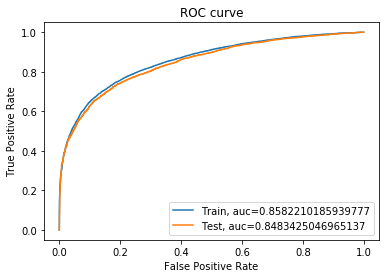

In [50]:
roc_curve(logreg, X_train_selected, y_db_train, X_test_selected, y_db_test)

__Evaluation__: This model's score on the testing set is 0.848 which is approximately close to the baseline model. It properly predicted 72.19% fraudulent transactions of the time. Looking at the false negative rate, this model has improved from misclassifying 27.8% normal transaction in the training set to 17.6% in the testing set. 

## Random Forest
Let's try using a Random Forest on the same training data to see if it will beat the performance of our baseline. The Random Forest is a much more powerful model especially when we use hundreds of trees.

In [51]:
# Random Forest Classifer
start_time = datetime.now()

print('Random Forest Classifer')

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the classifier
fit_and_evaluate(clf, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Random Forest Classifer
[0.90265828 0.91761941 0.91804951 0.91291582 0.92435646 0.91262767
 0.9286832  0.91203292 0.91508818 0.92273301]
This model's ROC AUC score is :  0.916138 (0.007052)
This model has an accuracy of 83.88% in predicting fraudulent transactions.

Duration: 0:06:55.160094


__Evaluation__: It appears that our initial random forest model doesn't appear to overfitt on the training set. It still preformed with a ROC score of 0.916 and has an accuracy of 83.88%.

### Model Interpretation: Feature Importances
For model interpretability, we will take a look at the feature importances of our initial random forest. We may use these feature importances as a method of dimensionality reduction in future work.


In [53]:
# Top N importances

clf.fit(X_le_train, y_le_train)

N = 10
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X_le.columns, 'Importance': importances})

top_N = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N

,Variable,Importance
0,TransactionAmt,0.024820
23,C13,0.023785
2,card1,0.019236
24,C14,0.019068
417,average_id_02_for_card1,0.017624
3,card2,0.017529
415,average_trans_amt_for_card1,0.016325
416,average_trans_amt_for_card4,0.015562
8,addr1,0.014455
414,transaction_hour,0.014248


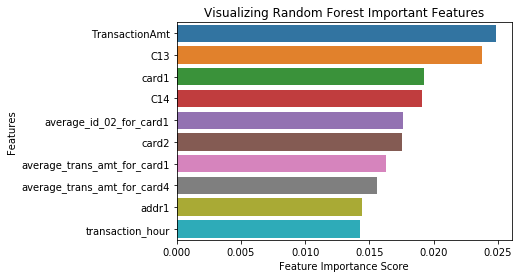

In [54]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Important Features")
plt.show()

__Observation__: Transaction amount and counting matches appears to be the most important features in detecting fraud. Our feature engineered variables also made it in the top ten with interactions between transaction amount and card information. 

Let's try to reduce the noise in the data by placing a threshold of 0.005 for feature importance. 

In [55]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.005
sfm = SelectFromModel(clf, threshold=0.005)

# Train the classifier
sfm.fit(X_le_train, y_le_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.005)

In [56]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_le_train)
X_important_test = sfm.transform(X_le_test)
X_important_train.shape, X_important_test.shape

((26321, 58), (6581, 58))

In [57]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
fit_and_evaluate(clf_important, X_important_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[0.89929208 0.91846966 0.91712245 0.91605011 0.92558897 0.91400897
 0.92918376 0.90891046 0.91526432 0.92118267]
This model's ROC AUC score is :  0.916637 (0.007754)
This model has an accuracy of 84.19% in predicting fraudulent transactions.

Duration: 0:14:10.650843


__Evaluation__: It looks like our selected importance features didn't have much positive effect on the performance of the model. The AUC score for this model is 0.916, which is lower than the inital random forest model. The accuracy did increase a bit from the previous model. 



### Optimization 
We'll continue with all features from the inital random forest for further tuning. 

In [ ]:
#Optimizing Random Forest
parameters = {}
parameters['criterion'] = ['entropy','gini']
parameters['max_depth'] = [10, 100, 250, 500]
parameters['n_estimators'] = [5,10,20,30]

gsc_clf = GridSearchCV(clf, parameters, cv=5, verbose=1, scoring='roc_auc')
gsc_clf.fit(X_le_train, y_le_train)
print(gsc_clf.best_params_, gsc_clf.best_score_)

# Result: {'criterion': 'entropy', 'max_depth': 250, 'n_estimators': 30} 0.909397244318672

In [58]:
#Optimized model with Random Forest Classifier
start_time = datetime.now()

clf_opt = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=250)

# Train the classifier
fit_and_evaluate(clf_opt, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[0.89711719 0.91728162 0.91473132 0.91071089 0.91915824 0.9095709
 0.92678497 0.90720069 0.91082066 0.92099841]
This model's ROC AUC score is :  0.911672 (0.006898)
This model has an accuracy of 83.33% in predicting fraudulent transactions.

Duration: 0:02:54.513817


__Evaluation__: This model has a AUC score is 0.91 on the testing set and a false negative rate of 19%, which is worse than the inital random forest model. 

Let's continue tuning to see if we can improve the preformance of the model. 

In [59]:
#Optimizing Random Forest
parameters = {}
parameters['min_samples_leaf'] = [50, 100, 200]
parameters['min_samples_split'] = [10, 30, 50]
parameters['max_leaf_nodes'] = [2, 10, 50]

gsc_clf = GridSearchCV(clf_opt, parameters, cv=5, verbose=1, scoring='roc_auc')
gsc_clf.fit(X_le_train, y_le_train)
print(gsc_clf.best_params_, gsc_clf.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  5.4min finished


{'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 50} 0.8672281193704677


In [60]:
#Optimized model with Random Forest Classifier
start_time = datetime.now()

clf_opt2 = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=250, 
                                  max_leaf_nodes=50, min_samples_leaf=50, min_samples_split=30 )
# Train the classifier
fit_and_evaluate(clf_opt2, X_le_train, y_le_train)


end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

[0.85060376 0.87263979 0.87082578 0.86816545 0.86888771 0.86543032
 0.8820634  0.86368573 0.86250633 0.87261319]
This model's ROC AUC score is :  0.868015 (0.008093)
This model has an accuracy of 79.09% in predicting fraudulent transactions.

Duration: 0:01:56.783948


__Evaluation__: Further tuning of random forest has decreased ROC score and has a lower accuracy rate than the previous random forest models. 

### Best performing Random Forest model

In [61]:
# Random Forest Classifer
start_time = datetime.now()

print('Random Forest Classifer')

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

pred_test(clf_opt, X_le_train, y_le_train, X_le_test, y_le_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Random Forest Classifer
This model's ROC AUC score is :  0.836982 (0.000000)
----------------------------------------------------
Predicted fraudulent transactions correctly (TPR):  [0.86535552 0.80860806]
Predicted normal transactions correctly (TNR):  [0.80860806 0.86535552]
Incorrectly predicted normal transactions (RPR):  [0.19139194 0.13464448]
Incorrectly predicted fraudulent transactions (FNR):  [0.13464448 0.19139194]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      3305
           1       0.86      0.81      0.83      3276

   micro avg       0.84      0.84      0.84      6581
   macro avg       0.84      0.84      0.84      6581
weighted avg       0.84      0.84      0.84      6581


Duration: 0:00:08.259765


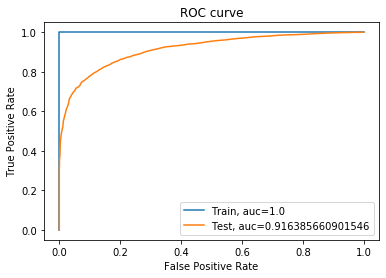

In [63]:
clf.fit(X_le_train, y_le_train)
roc_curve(clf, X_le_train, y_le_train, X_le_test, y_le_test)

__Evaluation__:  This model has the highest ROC AUC score on the test set 0.916. 

## Gradient Boost
Since tree based algorithm appears to work well with this dataset, we will continue with another ensemble model, gradient boosting. 


In [ ]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb = GradientBoostingClassifier(random_state=42)

# Train the classifier
fit_and_evaluate(gb, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

__Evaluation__: The inital gradient boosting model has a score of 0.89 on the testing set and false negative rate of 20%. These results are relatively lower than the random forest models.

### Feature Importance
Let's take a look at the feature importances of this model.

In [ ]:
# Top N importances

gb.fit(X_le_train, y_le_train)

N = 10
importances = gb.feature_importances_

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X_le.columns, 'Importance': importances})

top_N_gb = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N_gb

In [ ]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N_gb)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Gradient Boosting Important Features")
plt.show()

__Observation__: Count of card information matches and Vesta feature engineered variables appear to the top contributing factors in detecting fraud for this model. 

### Optimization 
We'll start tuning the number of trees added to the model. [Resource](https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/)

In [ ]:
#Optimizing Boosting Classifer
parameters = {}
parameters['n_estimators'] = [100,500,1000]
parameters['learning_rate'] =[0.15,0.1,0.05,0.01]

gsc_gb = GridSearchCV(gb, parameters, cv=5, scoring='roc_auc')
gsc_gb.fit(X_le_train, y_le_train)
print(gsc_gb.best_params_, gsc_gb.best_score_)

# {'n_estimators': 100} 0.8938210139826015

In [ ]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb_opt = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
fit_and_evaluate(gb_opt, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

__Evaluation__: The both the AUC score on the testing model and false negative rate remains around 0.89 and 20%. We'll stop here with tuning Gradient Boosting since it doesn't seem to be beating the Random Forest baseline model. 

### Best performing Gradient Boosting model

In [ ]:
# Gradient Boosting Classifer 
start_time = datetime.now()

gb = GradientBoostingClassifier(random_state=42)

# Train the classifier
pred_test(gb, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
gb.fit(X_le_train, y_le_train)
roc_curve(gb, X_le_train, y_le_train, X_le_test, y_le_test)

In [ ]:
#Optimizing Boosting Classifer
#parameters = {}
#parameters['max_depth'] = [2, 3, 4]
#parameters['min_samples_leaf'] = [10, 30, 60]
#parameters['max_features'] = [5,10,20]


#gsc_gb2 = GridSearchCV(gb_opt, parameters, cv=5, verbose=1, scoring='roc_auc')
#gsc_gb2.fit(X_le_train, y_le_train)
#print(gsc_gb2.best_params_, gsc_gb2.best_score_)

In [ ]:
# Gradient Boosting Classifer 
#start_time = datetime.now()

#gb_opt2 = GradientBoostingClassifier(random_state=42)

# Train and fit
#gb_opt2.fit(X_le_train, y_le_train)

#y_pred = gb_opt2.predict(X_le_test)

# Compute confusion matrix, and classification report
#print(confusion_matrix(y_le_test, y_pred))
#print(classification_report(y_le_test, y_pred))

#end_time = datetime.now()
#print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
#Optimizing Boosting Classifer
#parameters = {}
#parameters['subsample'] = [0.4, 0.6, 0.8]

#gsc_gb3 = GridSearchCV(gb_opt2, parameters, cv=5, scoring='roc_auc')
#gsc_gb3.fit(X_le_train, y_le_train)
#print(gsc_gb3.best_params_, gsc_gb3.best_score_)

In [ ]:
# Gradient Boosting Classifer 
#start_time = datetime.now()

#gb_opt3 = GradientBoostingClassifier(random_state=42)

# Train and fit
#gb_opt3.fit(X_le_train, y_le_train)

#y_pred = gb_opt3.predict(X_le_test)

# Compute confusion matrix, and classification report
#print(confusion_matrix(y_le_test, y_pred))
#print(classification_report(y_le_test, y_pred))

#end_time = datetime.now()
#print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
# ROC Curve
#y_pred_prob = gb_opt3.predict_proba(X_le_train)[:, 1]
#y_pred_proba2 = gb_opt3.predict_proba(X_le_test)[:, 1]
#fpr, tpr, _ = metrics.roc_curve(y_le_train, y_pred_proba)
#fpr2, tpr2, _ = metrics.roc_curve(y_le_test, y_pred_proba2)

#auc = metrics.roc_auc_score(y_le_train, y_pred_proba)
#auc2 = metrics.roc_auc_score(y_le_test, y_pred_proba2)

#fig, ax = plt.subplots()
#ax.plot(fpr, tpr, label="Train, auc="+str(auc))
#ax.plot(fpr2, tpr2, label="Test, auc="+str(auc2))

#plt.title('Optimized Random Forest ROC curve')
#ax.legend(['Train set', 'Test set'], loc=4)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

#plt.show()

## Inital Model Results

After feature selection, the logistic regression model performly better than random guess with a ROC score of 0.84 on the test set. Random forest with all features performed that best with a ROC score of 0.91 on the test set. Gradient boosting was a close match to random forest with a ROC score of 0.89 on the test set. However, its false negative rate remained 2% higher than random forset. With these results, we will move forward with only random forest. 

## Using Random Forest to Learn Imbalanced Data

In this section, we will continue to explore different random forest models for our dataset. [Resource](https://statistics.berkeley.edu/sites/default/files/tech-reports/666.pdf)

We will compare two different machine learning models:

1. Balanced Random Forest Classifer
2. Weighted Random Forest Classifer


In [ ]:
# Balanced Random Forest Classifer
start_time = datetime.now()

#Create a Gaussian Classifier
bclf = BalancedRandomForestClassifier(random_state=42)

# Train the classifier
bclf.fit(X_le_train, y_le_train)

fit_and_evaluate(bclf, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

__Evaluation__: This model has a score of 0.911 on the testing set and false negative rate of 18%. These results are comparable to our inital random forest model, the best performing model so far. 

In [ ]:
# Top N importances
N = 10
importances = bclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in bclf.estimators_],
             axis=0)

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X_le.columns, 'Importance': importances})

top_N_bclf = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N_bclf

In [ ]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N_bclf)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Balanced Important Features")
plt.show()

__Observation__: Similar to the previous random forest and gradient boosting models, count of matching card information and transaction amount are the most important features in detecting fraud.

### Optimization 
Now, we'll try to tune the model. 

In [ ]:
#Optimizing Balanced Random Forest
parameters = {}
parameters['n_estimators'] = [30, 60, 100]

gsc_bclf = GridSearchCV(bclf, parameters, cv=5, verbose=1, scoring='roc_auc')
gsc_bclf.fit(X_le_train, y_le_train)
print(gsc_bclf.best_params_, gsc_bclf.best_score_)

# {'criterion': 'entropy', 'max_depth': 100, 'n_estimators': 30} 0.9081553906428432

In [ ]:
#Optimized model with Balanced Random Forest Classifier
start_time = datetime.now()

bclf_opt = BalancedRandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=100)
bclf_opt.fit(X_le_train, y_le_train)
fit_and_evaluate(bclf_opt, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

__Evaluation__: This model has a score fo 0.91 on the testing set and false negative rate of 19%. Tuning the balanced random forest model has resulted in a lower ROC score and higher false negative rate than previous model. 

### Best performing Balanced Random Forest model

In [ ]:
# Random Forest Classifer
start_time = datetime.now()

print('Random Forest Classifer')

#Create a Gaussian Classifier
bclf = BalancedRandomForestClassifier(n_estimators=100, n_jobs=-1)
bclf.fit(X_le_train, y_le_train)
pred_test(bclf, X_le_train, y_le_train, X_le_test, y_le_test)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
roc_curve(bclf, X_le_train, y_le_train, X_le_test, y_le_test)

## Weighted Random Forest
Next, we'll try penalizing incorrectly labeling the classes. 

In [ ]:
# Balanced Random Forest Classifer
start_time = datetime.now()

#Create a Gaussian Classifier
bclf_w = BalancedRandomForestClassifier(class_weight="balanced",n_jobs=-1,random_state=42)

# Train the classifier
bclf_w.fit(X_le_train, y_le_train)
fit_and_evaluate(bclf_w, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

__Evaluation__: This model's score on the test set is 0.912 and false negative rate is 18%. This is an improvement from the inital balanced random forest model. 

In [ ]:
# Top N importances
N = 10
importances = bclf_w.feature_importances_
std = np.std([tree.feature_importances_ for tree in bclf_w.estimators_],
             axis=0)

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X_le.columns, 'Importance': importances})

top_N_bclf_w = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N_bclf_w

In [ ]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N_bclf_w)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Weighted Balanced Important Features")
plt.show()

__Observation__: As previously mentioned, count match rate of card information and transaction amount continues to be the best indicators of fraud detection for these models. 

In [ ]:
#Optimizing Weighted Balanced Random Forest
parameters = {}
parameters['max_depth'] = [500, 600, 800]
parameters['n_estimators'] = [30, 60, 100]

gsc_bclf = GridSearchCV(bclf_w, parameters, cv=5, verbose=1, scoring='roc_auc')
gsc_bclf.fit(X_le_train, y_le_train)
print(gsc_bclf.best_params_, gsc_bclf.best_score_)

#Results: {'criterion': 'entropy', 'max_depth': 500, 'n_estimators': 30} 0.9081101038814143

In [ ]:
#Optimized model with Balanced Random Forest Classifier
start_time = datetime.now()

bclf_w_opt = BalancedRandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=500)
bclf_w_opt.fit(X_le_train, y_le_train)
fit_and_evaluate(bclf_w_opt,X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

### Best Weighted Random Forest Model 

In [ ]:
# Balanced Random Forest Classifer
start_time = datetime.now()

#Create a Gaussian Classifier
bclf_w = BalancedRandomForestClassifier(class_weight="balanced",n_jobs=-1,random_state=42)

# Train the classifier
bclf_w.fit(X_le_train, y_le_train)
fit_and_evaluate(bclf_w, X_le_train, y_le_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

In [ ]:
bclf_w.fit(X_le_train, y_le_train)
roc_curve(bclf_w, X_le_train, y_le_train, X_le_test, y_le_test

__Evaluation__: This model scored 0.91 on the testing set and has a false negative rate of 19%. 

## Comparing Results
Let's aggregate our results and compare model preformance. 

In [ ]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'Model': ['Logistic Regression Inital','Logistic Regression Optimized',
                                           'Random Forest Classifier Inital','RandomForest Classifier Important Features',
                                           'Random Forest Classifier Optimized Iteration 1', 'Random Forest Classifier Optimized Iteration 2',
                                           'Gradient Boosting Classifer Inital','Gradient Boosting Classifer Optimized',
                                           'Balanced Random Forest Classifer Inital','Balanced Random Forest Classifer Optimized',
                                           'Weighted Balanced Random Forest Classifer Inital','Weighted Balanced Random Forest Classifer'],
                                 'ROC_AUC Train': [lr_auc, lr_opt_auc, clf_auc, clf_imp_auc, clf_opt_auc, clf_opt2_auc, gb_auc, gb_opt_auc, 
                                                   bclf_auc, bclf_opt_auc, bclf_w_auc, bclf_w_opt_auc],
                                           'ROC_AUC Test': [ lr_auc2, lr_opt_auc2, clf_auc2, clf_imp_auc2, clf_opt_auc2, clf_opt2_auc2, gb_auc2, gb_opt_auc2, 
                                                            bclf_auc2, bclf_opt_auc2, bclf_w_auc2, bclf_w_opt_auc2]})

# Horizontal bar chart of test ROC
model_comparison.sort_values('ROC_AUC Test', ascending = False)

In [ ]:
# Sort model comparison
sort_model_comp = model_comparison.sort_values('ROC_AUC Test', ascending = False)

# Plot model comparison
ax = sns.barplot(y = 'Model', x = 'ROC_AUC Test', data=sort_model_comp)
ax.set_xlabel('ROC AUC')
ax.set_ylabel('')
plt.title('Model Comparison Test ROC_AUC')

### Result: 
As shown in the bar chart, the initial random forest class had the best ROC score of 0.916. It also incorrectly misclassified normal transactions 17% of the time, which was the lowest score out of all the models. 

# Conclusion: 

In this project, we used several supervised machine learning models to predict fraudulent transactions. While using ROC AUC score as our main metric for model evaluation, we also looked into the model's failure to properly classify normal transactions. Incorrectly labeling fraud as normal transaction would result in more loss than improperly labeling a normal transaction as fraud. 

### Future Work

If given more memory capacity, I would consider exploring oversampling methods and utilize different utilize different imbalanced class techniques. More observations may improve the random forest model's performance. With the information from all the feature importance graphs, I would also engineer more features with transaction amount, card columns, count columns and time features. 

